## 라이브러리, 데이터 불러오기

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statistics

In [46]:
df_train = pd.read_csv('/content/drive/MyDrive/hana1/project1/data/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/hana1/project1/data/test.csv')
df_train.head()
df_test.head()

<ipython-input-46-521dc3cdf84e>:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv('/content/drive/MyDrive/hana1/project1/data/train.csv')


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923


In [47]:
# Check Data Size
print('Train Data Size : ',df_train.shape)
print('Test Data Size : ',df_test.shape)

Train Data Size :  (100000, 28)
Test Data Size :  (50000, 27)


In [48]:
df_train.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [49]:
# Check Train dataset
# 데이터 세트에 누락된 값이 있습니다.
print(df_train.info())
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [50]:
# 숫자 데이터 유형이 있는 필드의 통계 값 확인
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,84998.0,4194.170850,3183.686167,303.645417,1625.568229,3093.745000,5957.448333,15204.633333
Num_Bank_Accounts,100000.0,17.091280,117.404834,-1.000000,3.000000,6.000000,7.000000,1798.000000
Num_Credit_Card,100000.0,22.474430,129.057410,0.000000,4.000000,5.000000,7.000000,1499.000000
Interest_Rate,100000.0,72.466040,466.422621,1.000000,8.000000,13.000000,20.000000,5797.000000
Delay_from_due_date,100000.0,21.068780,14.860104,-5.000000,10.000000,18.000000,28.000000,67.000000
Num_Credit_Inquiries,98035.0,27.754251,193.177339,0.000000,3.000000,6.000000,9.000000,2597.000000
Credit_Utilization_Ratio,100000.0,32.285173,5.116875,20.000000,28.052567,32.305784,36.496663,50.000000
Total_EMI_per_month,100000.0,1403.118217,8306.041270,0.000000,30.306660,69.249473,161.224249,82331.000000


In [51]:
# 숫자 데이터 유형 이외의 필드에 대한 통계 값 확인
df_train.describe(exclude=np.number).T

,count,unique,top,freq
ID,100000,100000,0x1602,1
Customer_ID,100000,12500,CUS_0xd40,8
Month,100000,8,January,12500
Name,90015,10139,Langep,44
Age,100000,1788,38,2833
SSN,100000,12501,#F%$D@*&8,5572
Occupation,100000,16,_______,7062
Annual_Income,100000,18940,36585.12,16
Num_of_Loan,100000,434,3,14386
Type_of_Loan,88592,6260,Not Specified,1408


## 함수정리

#### 컬럼 정보

In [52]:
# 컬럼에 대한 널값,숫자 유니크, 분포
def get_column_details(df,column):
    print("Details of",column,"column")

    # 데이터 타입
    print("\nDataType: ",df[column].dtype)

    # 널 값 존재하는지 확인 여부
    count_null = df[column].isnull().sum()
    if count_null==0:
        print("\nThere are no null values")
    elif count_null>0:
        print("\nThere are ",count_null," null values")

    # 고유값 개수 확인
    print("\nNumber of Unique Values: ",df[column].nunique())

    # 컬럼 분포 확인
    print("\nDistribution of column:\n")
    print(df[column].value_counts())

### 범주형 변수 clean
### garbage_value = replace_value

In [53]:
def clean_categorical_field(df, column, replace_value=None):

    # gabage => nan 값 처리 해주기.
    if replace_value!=None:
        df[column] = df[column].replace(replace_value, np.nan)
        print(f"\nGarbage value {replace_value} is replaced with np.nan")
    return df

### no

In [54]:
def replace_nm_no(df, column):
  # replace NM => No
  df[column] = df[column].replace('NM', 'No')

  return df

### nan 채우는 함수

#### 그룹별 최빈값 함수
#### occupation, payment behavior

In [55]:
# na 값 그룹의 최빈값으로 채우기 => occupation, payment behavior
def fill_missing_with_group_mode(df, groupby, column):
    print("\nNo. of missing values before filling with group mode:",df[column].isnull().sum())

    # Fill with local mode
    mode_per_group = df.groupby(groupby)[column].transform(lambda x: x.mode()[0])
    df[column] = df[column].fillna(mode_per_group)

    print("\nNo. of missing values after filling with group mode:",df[column].isnull().sum())

    return df

#### 그룹별 중앙값
#### Monthly Inhand Salary(왜도설명)
#### Credit History Age (평균도 해보기)
#### Amount Invested Monthly
#### Monthly Balance
#### Num_of_Delayed_Payment
#### Num_Credit_Inquiries  

In [56]:
# na 값 그룹의 중앙값으로 채우기
def fill_missing_with_group_median(df, groupby, column):
    print("\nNo. of missing values before filling with group median:",df[column].isnull().sum())

    # 그룹별 중앙값 구해서 na 중앙값 채우기
    median_per_group = df.groupby(groupby)[column].transform(lambda x: x.median())
    df[column] = df[column].fillna(median_per_group)

    print("\nNo. of missing values after filling with group median:",df[column].isnull().sum())

    return df

#### 그룹별 평균
#### Credit History Age (평균도 해보기)
#### Amount Invested Monthly
#### Monthly Balance
#### Num_of_Delayed_Payment
#### Num_Credit_Inquiries  

In [57]:
# na 값 그룹의 평균으로 채우기
def fill_missing_with_group_mean(df, groupby, column):
    print("\nNo. of missing values before filling with group mean:",df[column].isnull().sum())

    # 그룹별 중앙값 구해서 na 중앙값 채우기
    mean_per_group = df.groupby(groupby)[column].transform(lambda x: x.mean())
    df[column] = df[column].fillna(mean_per_group)

    print("\nNo. of missing values after filling with group mean:",df[column].isnull().sum())

    return df

### 그래프 그리기

#### _stacked_bar

In [58]:
# column1 = 현재 열, column2 = 비교열
def plot_stacked_bar(df,column1,column2, rotation=0):

    print(f'\n{column1} & {column2} Distribution')
    palette = "deep"
    sns.set_palette(palette)

    # bar 그려주기
    pd.crosstab(df[column1], df[column2]).plot(kind='bar', stacked=True)

    plt.xlabel(f'{column1}')
    plt.ylabel('Number of Records')
    plt.title(f'{column1} & {column2} Distribution')
    plt.xticks(rotation=rotation)

    plt.show()

#### countplot

In [59]:
def plot_countplot(df, column, rotation=0):

    print(f'\n{column} Distribution')
    palette = "deep"
    sns.set_palette(palette)

    sns.countplot(data=df, x=column)

    plt.xlabel(f'{column}')
    plt.ylabel('Number of Records')
    plt.title(f'{column} Distribution')
    plt.xticks(rotation=rotation)

    plt.show()

#### discount plot

In [60]:
def plot_displot(df, column, rotation=0, bins=20):
    print(f'\n{column} Distribution')
    palette = "deep"
    sns.set_palette(palette)

    sns.displot(data=df, x=column, kde=True, bins=bins)

    plt.xlabel(f'{column}')
    plt.ylabel('Number of Records')
    plt.title(f'{column} Distribution')
    plt.xticks(rotation=rotation)

    plt.show()

### 숫자형 변수 clean

In [61]:
def clean_numerical_field(df, column, strip=None, datatype=None, replace_value=None):

    # garbage => nan
    if replace_value!=None:
        df[column] = df[column].replace(replace_value,np.nan)
        print(f"\nGarbage value {replace_value} is replaced with np.nan")

    # 숫자 옆 특수문자 지우기
    # 각 요소에서 지정된 문자의 선행 및 후행 항목을 제거 => strip
    if df[column].dtype == object and strip is not None:
        df[column] = df[column].str.strip(strip)
        print(f"\n{strip} are removed")

    # 데이터 타입 변경
    if datatype is not None:
        df[column] = df[column].astype(datatype)
        print(f"\nDatatype of {column} is changed to {datatype}")

    return df


### iqr

#### iqr_drop =  outlier_iqr_drop

In [62]:
def outlier_iqr_drop(df, groupby, column):
    df_iqr = df.copy()

    mode_by_group = df_iqr.groupby(groupby)[column].transform(lambda x: x.mode()[0] if not x.mode().empty else x.median())
    df_iqr[column] = df_iqr[column].fillna(mode_by_group)
    print(mode_by_group)


    q25, q75 = np.percentile(df_iqr[column], 25), np.percentile(df_iqr[column], 75)
    print('q25' , q25, 'q75', q75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    print(lower, upper)

    df[column] = df[column].apply(lambda x: np.nan if ((x < lower) | (x > upper)) else x)
    print(df[column].value_counts(dropna=False))

    # drop
    df.dropna(subset=[column], inplace=True)
    print(df[column].value_counts(dropna=False))

    return df

#### iqr 대체 = outlier_iqr_fill

In [63]:
def outlier_iqr_fill(df, groupby, column):
    df_iqr = df.copy()

    mode_by_group = df_iqr.groupby(groupby)[column].transform(lambda x: x.mode()[0] if not x.mode().empty else np.NaN)
    df_iqr[column].fillna(mode_by_group, inplace=True)


    q25, q75 = np.percentile(df_iqr[column], 25), np.percentile(df_iqr[column], 75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off

    df[column] = df[column].apply(lambda x: upper if (x > upper) else x)
    df[column] = df[column].apply(lambda x: lower if (x < lower) else x)

    # drop

    return df

### 음수값 처리 함수

In [64]:
def remove_negatives(df, column):

    #if df[column].dtypes == object:
        # 숫자형으로 바꾸기 + 언더바 없애기(_)
     #   df[column] = pd.to_numeric(df[column].str.replace('_', ''))

    # negative값의 개수
    count_negative = np.sum(df[column] < 0)
    print("\n-----------------------------------------------------")
    print("\nThere are ",count_negative," negative values(Before)")

    # 음수값 제거 -> 0보다 큰 값만 사용
    df = df[df[column] >= 0]

    count_negative = np.sum(df[column] < 0)
    print("\n-----------------------------------------------------")
    print("\nThere are ",count_negative," negative values(After)")

    return df

### month_Converter

In [65]:
def Month_Converter(df, column):

    def Sub_Month_Converter(val):
        if pd.notnull(val):
            years = int(val.split(' ')[0])
            month = int(val.split(' ')[3])
            return (years*12)+month
        else:
            return val

    df[column] = df[column].apply(lambda x: Sub_Month_Converter(x)).astype(float)

    return df

In [66]:
## 복사본
df_clean = df_train.copy()

In [67]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Categorical Variables

### credit score
#### 표준 - 53% 나쁨 - 29% 좋음 - 17%

#### 신용 점수에는 null 값이 없습니다

Details of Credit_Score column

DataType:  object

There are no null values

Number of Unique Values:  3

Distribution of column:

Standard    53174
Poor        28998
Good        17828
Name: Credit_Score, dtype: int64

Credit_Score Distribution


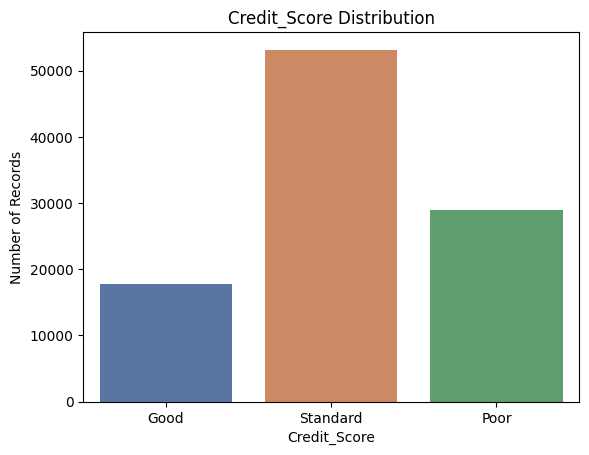

In [68]:
column_name = 'Credit_Score'

# 칼럼 정보
get_column_details(df_clean,column_name)

# 빈도그래프
plot_countplot(df_clean, column_name)

### customer_id

In [69]:
get_column_details(df_clean,'Customer_ID')

Details of Customer_ID column

DataType:  object

There are no null values

Number of Unique Values:  12500

Distribution of column:

CUS_0xd40     8
CUS_0x9bf4    8
CUS_0x5ae3    8
CUS_0xbe9a    8
CUS_0x4874    8
             ..
CUS_0x2eb4    8
CUS_0x7863    8
CUS_0x9d89    8
CUS_0xc045    8
CUS_0x942c    8
Name: Customer_ID, Length: 12500, dtype: int64


In [70]:
# 동일한 고객이 다른 신용 점수를 가질 수 있는지 확인
df_clean.groupby(['Customer_ID'])['Credit_Score'].nunique()

Customer_ID
CUS_0x1000    2
CUS_0x1009    1
CUS_0x100b    2
CUS_0x1011    1
CUS_0x1013    1
             ..
CUS_0xff3     2
CUS_0xff4     1
CUS_0xff6     2
CUS_0xffc     2
CUS_0xffd     2
Name: Credit_Score, Length: 12500, dtype: int64

### month

Details of Month column

DataType:  object

There are no null values

Number of Unique Values:  8

Distribution of column:

January     12500
February    12500
March       12500
April       12500
May         12500
June        12500
July        12500
August      12500
Name: Month, dtype: int64

Month & Credit_Score Distribution


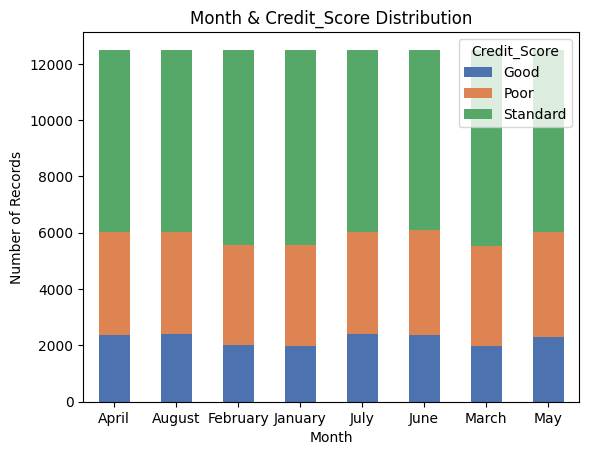

In [71]:
column_name = 'Month'

# 칼럼 정보
get_column_details(df_clean,column_name)

# plot
plot_stacked_bar(df_clean,column_name,'Credit_Score')

In [72]:
# 월을 datetime 객체로 변환(1~8) , 데이터 타입 변환
df_clean['Month'] = pd.to_datetime(df_clean.Month, format='%B').dt.month
df_clean['Month']

0        1
1        2
2        3
3        4
4        5
        ..
99995    4
99996    5
99997    6
99998    7
99999    8
Name: Month, Length: 100000, dtype: int64

In [73]:
df_clean

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,1,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,2,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,3,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,4,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,5,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,4,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,5,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,6,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,7,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


### occupation
### garbage_value = '_______' => nan
### nan => 그룹화 최빈값

Details of Occupation column

DataType:  object

There are no null values

Number of Unique Values:  16

Distribution of column:

_______          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: Occupation, dtype: int64

Garbage value _______ is replaced with np.nan

No. of missing values before filling with group mode: 7062

No. of missing values after filling with group mode: 0

Occupation & Credit_Score Distribution


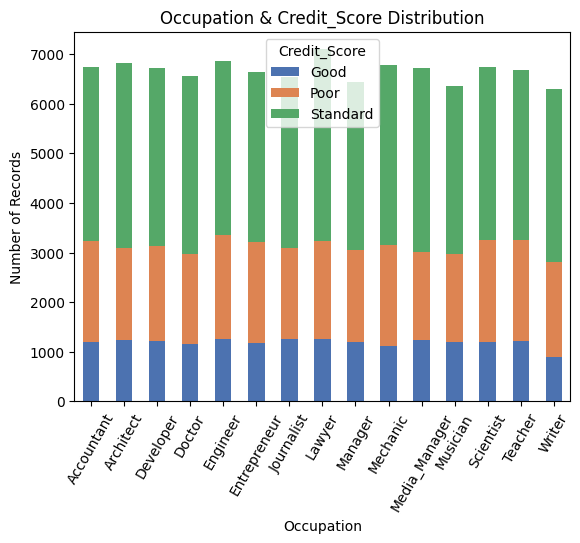

In [74]:
column_name = 'Occupation'
group_by = 'Customer_ID'
garbage_value = '_______'

get_column_details(df_clean,column_name)

# garbage_value => nan 처리 해줌
df_clean = clean_categorical_field(df_clean, column_name, garbage_value)

# nan 값 그룹화 최빈값 처리
df_clean = fill_missing_with_group_mode(df_clean, group_by, column_name)

# plot
plot_stacked_bar(df_clean,column_name,'Credit_Score',rotation=60)

In [75]:
df_clean

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,1,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,2,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,3,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,4,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,5,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,4,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,5,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,6,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,7,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


### credit mix
### 전처리 x

Details of Credit_Mix column

DataType:  object

There are no null values

Number of Unique Values:  4

Distribution of column:

Standard    36479
Good        24337
_           20195
Bad         18989
Name: Credit_Mix, dtype: int64

Credit_Mix & Credit_Score Distribution


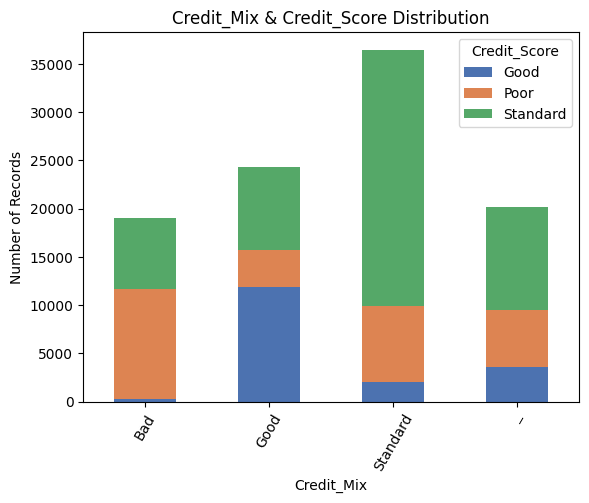

In [76]:
column_name = 'Credit_Mix'

# Get Details
get_column_details(df_clean,column_name)

# Plot
plot_stacked_bar(df_clean,column_name,'Credit_Score',rotation=60)

### Payment_of_Min_Amount NO

Details of Payment_of_Min_Amount column

DataType:  object

There are no null values

Number of Unique Values:  3

Distribution of column:

Yes    52326
No     35667
NM     12007
Name: Payment_of_Min_Amount, dtype: int64

Payment_of_Min_Amount & Credit_Score Distribution


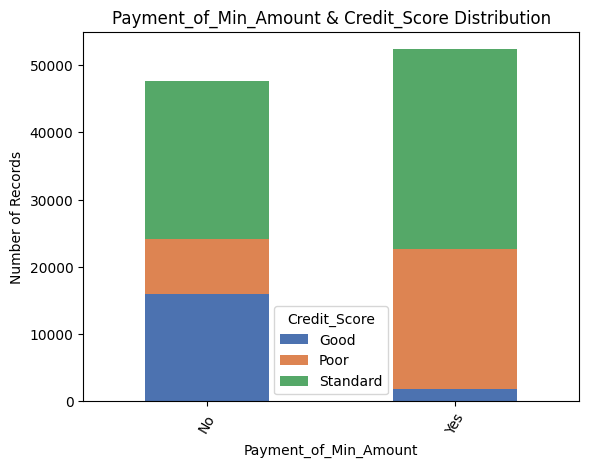

In [77]:
column_name = 'Payment_of_Min_Amount'

# Get Details
get_column_details(df_clean,column_name)

# Replace NM => No
df_clean = replace_nm_no(df_clean, column_name)

# Plot
plot_stacked_bar(df_clean,column_name,'Credit_Score',rotation=60)

### Payment Behaviour
### garbage => nan
### customer_id 최빈값


Garbage value !@9#%8 is replaced with np.nan

No. of missing values before filling with group mode: 7600

No. of missing values after filling with group mode: 0

Payment_Behaviour & Credit_Score Distribution


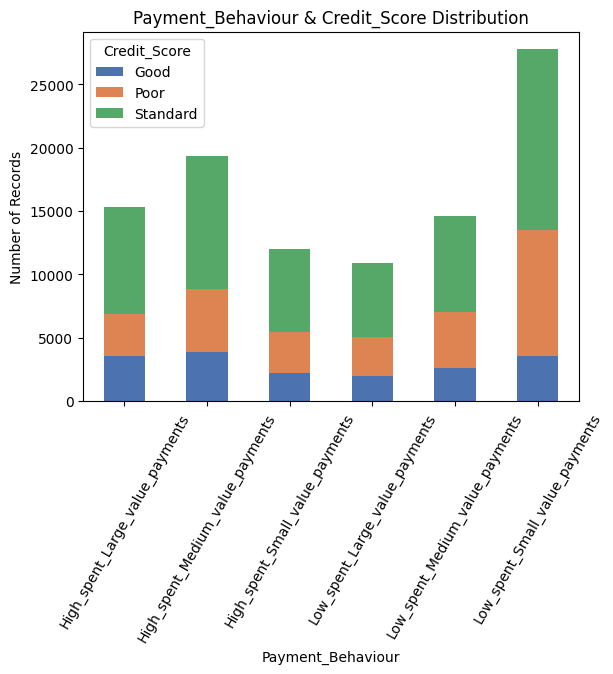

In [78]:
column_name = 'Payment_Behaviour'
group_by = 'Customer_ID'
garbage_value = '!@9#%8'

clean_categorical_field(df_clean, column_name, garbage_value)

# nan 값 그룹화 최빈값 처리
df_clean = fill_missing_with_group_mode(df_clean, group_by, column_name)

# plot
plot_stacked_bar(df_clean,column_name,'Credit_Score',rotation=60)

## Numerical Variables
### 후행 및 선행 특수 문자를 제거합니다.
### 필요한 경우 데이터 유형을 객체에서 int/float로 변환합니다.
### Customer_ID로 그룹화할 때 null 값 및 이상값을 모드 값으로 대체

### age
### 1) _ 제거
### 2) iqr
### 3) 음수 확인

Details of Age column

DataType:  object

There are no null values

Number of Unique Values:  1788

Distribution of column:

38      2833
28      2829
31      2806
26      2792
32      2749
        ... 
471        1
1520       1
8663       1
3363       1
1342       1
Name: Age, Length: 1788, dtype: int64

_ are removed

Datatype of Age is changed to <class 'int'>

Age Distribution


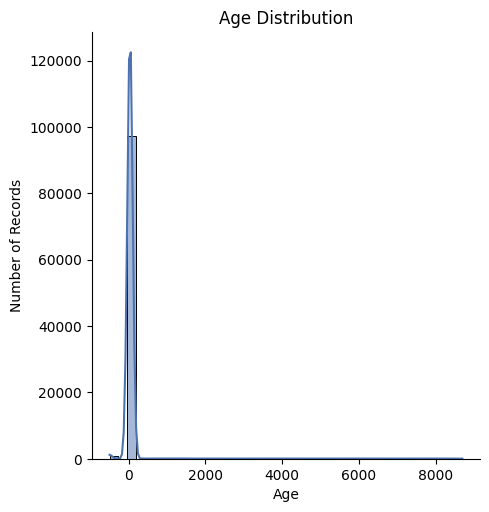

0        23
1        23
2        23
3        23
4        23
         ..
99995    25
99996    25
99997    25
99998    25
99999    25
Name: Age, Length: 100000, dtype: int64
q25 24.0 q75 42.0
-3.0 69.0
38.0    2994
28.0    2968
31.0    2955
26.0    2945
32.0    2884
36.0    2868
35.0    2866
25.0    2861
27.0    2859
39.0    2846
34.0    2837
44.0    2824
19.0    2793
22.0    2785
41.0    2785
NaN     2781
20.0    2744
37.0    2742
29.0    2735
43.0    2734
30.0    2727
21.0    2716
24.0    2714
23.0    2654
45.0    2642
40.0    2609
42.0    2577
33.0    2543
18.0    2385
46.0    1621
15.0    1574
17.0    1502
16.0    1455
48.0    1385
49.0    1375
55.0    1366
52.0    1356
53.0    1354
54.0    1311
51.0    1291
50.0    1273
47.0    1227
14.0    1175
56.0     362
Name: Age, dtype: int64
38.0    2994
28.0    2968
31.0    2955
26.0    2945
32.0    2884
36.0    2868
35.0    2866
25.0    2861
27.0    2859
39.0    2846
34.0    2837
44.0    2824
19.0    2793
41.0    2785
22.0    2785
20.0    2

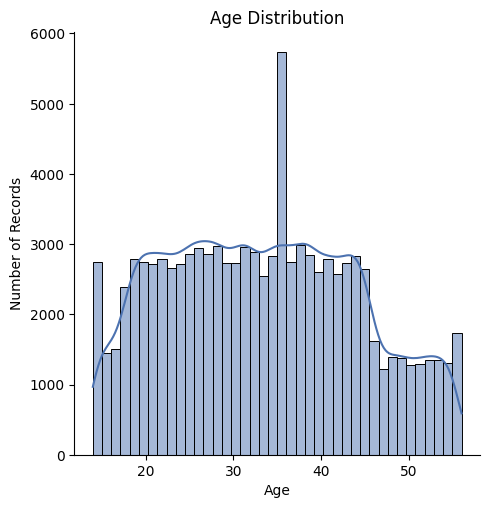

In [79]:
column_name = 'Age'
group_by = 'Customer_ID'

get_column_details(df_clean, column_name)

# clean
df_clean = clean_numerical_field(df_clean, column_name, strip='_', datatype=int)

# plot
plot_displot(df_clean,column_name,bins=40)

# iqr
df_clean = outlier_iqr_drop(df_clean, group_by, column_name)
#outlier_iqr_fill(df_train, group_by, column_name)

# remove
df_clean = remove_negatives(df_clean, column_name)

# plot
plot_displot(df_clean,column_name,bins=40)

In [80]:
df_clean.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,1,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,2,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
3,0x1605,CUS_0xd40,4,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,5,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
5,0x1607,CUS_0xd40,6,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,High_spent_Medium_value_payments,340.4792117872438,Good


### Annual Income
#### _ 제거
### iqr

In [81]:
df_clean.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9716
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       14596
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11074
Delay_from_due_date             0
Num_of_Delayed_Payment       6824
Changed_Credit_Limit            0
Num_Credit_Inquiries         1906
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           8791
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4344
Payment_Behaviour               0
Monthly_Balance              1179
Credit_Score                    0
dtype: int64

Details of Annual_Income column

DataType:  object

There are no null values

Number of Unique Values:  18812

Distribution of column:

20867.67     16
36585.12     16
95596.35     15
17273.83     15
33029.66     15
             ..
54734.0_      1
37840.64_     1
42843.65_     1
44134.06_     1
70778.4_      1
Name: Annual_Income, Length: 18812, dtype: int64

_ are removed

Datatype of Annual_Income is changed to <class 'float'>

Annual_Income Distribution


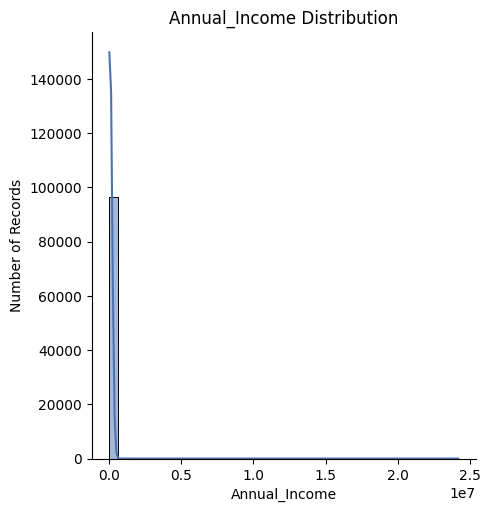

0        19114.12
1        19114.12
3        19114.12
4        19114.12
5        19114.12
           ...   
99995    39628.99
99996    39628.99
99997    39628.99
99998    39628.99
99999    39628.99
Name: Annual_Income, Length: 97219, dtype: float64
q25 19462.925 q75 72817.02
-60568.2175 152848.1625
NaN          2699
36585.12       16
109945.32      16
40341.16       16
20867.67       16
             ... 
139538.32       5
16921.67        5
14480.21        5
99403.32        4
108064.48       4
Name: Annual_Income, Length: 12265, dtype: int64
20867.67     16
36585.12     16
109945.32    16
40341.16     16
32543.38     16
             ..
14480.21      5
103353.06     5
32669.33      5
99403.32      4
108064.48     4
Name: Annual_Income, Length: 12264, dtype: int64

Annual_Income Distribution


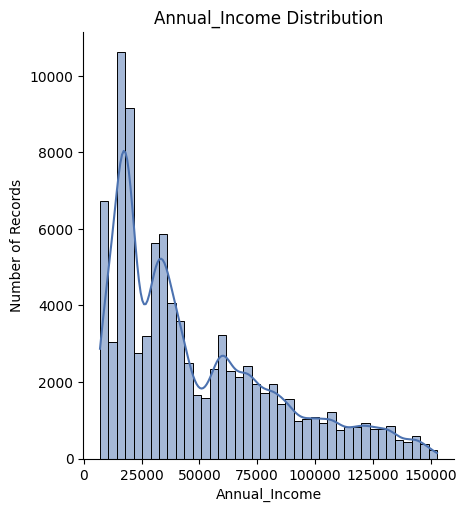

In [82]:
column_name = 'Annual_Income'
group_by = 'Customer_ID'

get_column_details(df_clean,column_name)

# Clean
df_clean = clean_numerical_field(df_clean, column_name, strip='_', datatype=float)

plot_displot(df_clean, column_name, bins=40)

# iqr
df_clean = outlier_iqr_drop(df_clean, group_by, column_name)

#Plot Graph
plot_displot(df_clean, column_name, bins=40)

In [83]:
df_clean.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,1,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,2,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
3,0x1605,CUS_0xd40,4,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,5,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
5,0x1607,CUS_0xd40,6,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,High_spent_Medium_value_payments,340.4792117872438,Good


In [84]:
df_clean.shape

(94520, 28)

### Monthly Inhand Salary
#### null 값이 있습니다.
#### 월 소득 급여에 대한 이상치는 없었습니다.
#### 대부분의 고객은 월 소득이 낮습니다. 분포가 오른쪽으로 치우쳐 있습니다.

Details of Monthly_Inhand_Salary column

DataType:  float64

There are  14166  null values

Number of Unique Values:  12990

Distribution of column:

6082.187500     15
6769.130000     15
2295.058333     15
3080.555000     14
5766.491667     13
                ..
10018.500000     1
7545.800911      1
6450.393333      1
3102.778454      1
3304.807427      1
Name: Monthly_Inhand_Salary, Length: 12990, dtype: int64

Monthly_Inhand_Salary Distribution


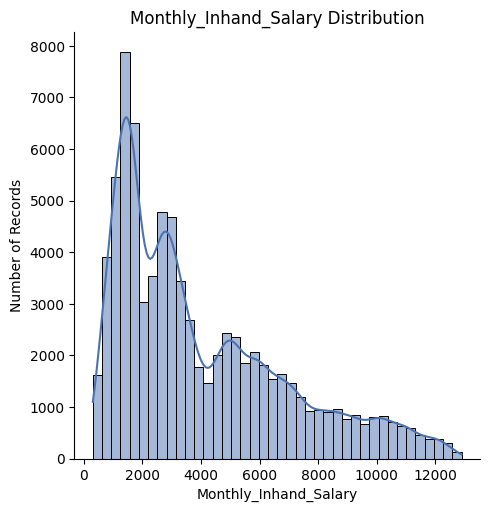


No. of missing values before filling with group median: 14166

No. of missing values after filling with group median: 0
0        1824.843333
1        1824.843333
3        1824.843333
4        1824.843333
5        1824.843333
            ...     
99995    3359.415833
99996    3359.415833
99997    3359.415833
99998    3359.415833
99999    3359.415833
Name: Monthly_Inhand_Salary, Length: 94520, dtype: float64
q25 1617.1308333333334 q75 5805.84
-4665.932916666666 12088.90375
NaN            693
3080.555000     16
6639.560000     16
1315.560833     16
536.431250      16
              ... 
2995.596667      1
622.937198       1
1703.865521      1
8862.923431      1
1295.107500      1
Name: Monthly_Inhand_Salary, Length: 12951, dtype: int64
3080.555000    16
6639.560000    16
1315.560833    16
536.431250     16
6769.130000    16
               ..
2995.596667     1
622.937198      1
1703.865521     1
8862.923431     1
1295.107500     1
Name: Monthly_Inhand_Salary, Length: 12950, dtype: int64

M

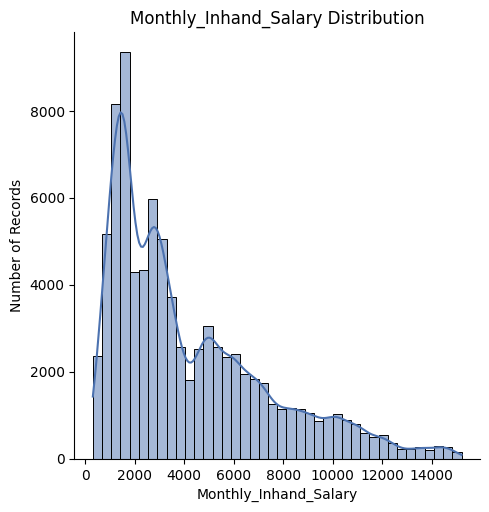

In [85]:
column_name = 'Monthly_Inhand_Salary'
group_by = 'Customer_ID'

#Get Details
get_column_details(df_clean,column_name)

#Cleaning
df_clean = clean_numerical_field(df_clean, column_name)

plot_displot(df_clean, column_name, bins=40)

# median
df_clean = fill_missing_with_group_median(df_clean, group_by, column_name)

# iqr
df_clean = outlier_iqr_drop(df_clean, group_by, column_name)

#Plot Graph
plot_displot(df_train, column_name, bins=40)

In [86]:
df_clean.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,1,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,2,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
3,0x1605,CUS_0xd40,4,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,5,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
5,0x1607,CUS_0xd40,6,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,High_spent_Medium_value_payments,340.4792117872438,Good


In [87]:
df_clean.shape

(93827, 28)

### Num Bank Accounts
#### 일부 이상치, 음수 값이 있습니다.
#### 정리 후 이 필드에는 11개의 가능한 값이 있습니다. Num Bank Accounts 범위는 0에서 10입니다.
#### 대부분의 고객은 그렇지 않습니다. 3에서 8 사이의 은행 계좌

Details of Num_Bank_Accounts column

DataType:  int64

There are no null values

Number of Unique Values:  903

Distribution of column:

6       12457
7       12348
8       12292
4       11322
5       11222
        ...  
211         1
1221        1
753         1
324         1
697         1
Name: Num_Bank_Accounts, Length: 903, dtype: int64

Num_Bank_Accounts Distribution


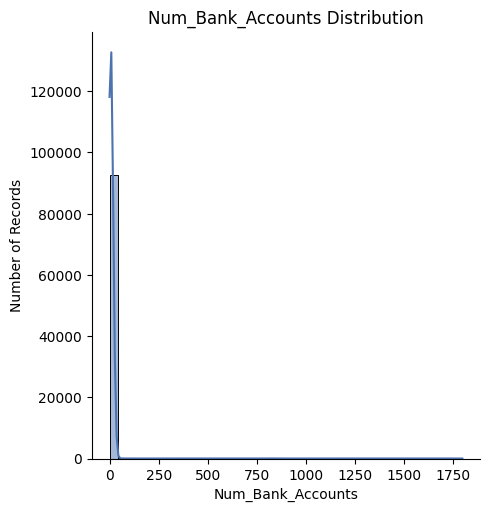

0        3
1        3
3        3
4        3
5        3
        ..
99995    4
99996    4
99997    4
99998    4
99999    4
Name: Num_Bank_Accounts, Length: 93827, dtype: int64
q25 4.0 q75 8.0
-2.0 14.0
 6.0     12457
 7.0     12348
 8.0     12292
 4.0     11322
 5.0     11222
 3.0     11125
 9.0      5237
 10.0     5052
 1.0      3931
 0.0      3871
 2.0      3701
 NaN      1241
-1.0        20
 11.0        8
Name: Num_Bank_Accounts, dtype: int64
 6.0     12457
 7.0     12348
 8.0     12292
 4.0     11322
 5.0     11222
 3.0     11125
 9.0      5237
 10.0     5052
 1.0      3931
 0.0      3871
 2.0      3701
-1.0        20
 11.0        8
Name: Num_Bank_Accounts, dtype: int64

-----------------------------------------------------

There are  20  negative values(Before)

-----------------------------------------------------

There are  0  negative values(After)

Num_Bank_Accounts Distribution


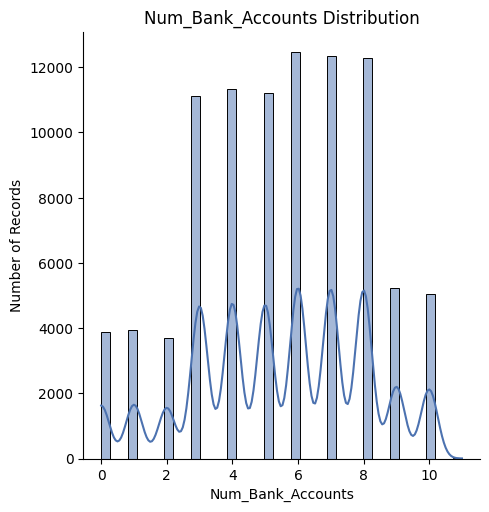

In [88]:
column_name = 'Num_Bank_Accounts'
group_by = 'Customer_ID'

# Get Details
get_column_details(df_clean, column_name)

# Cleaning
df_clean = clean_numerical_field(df_clean, column_name)

# Plot Graph
plot_displot(df_clean, column_name, bins=40)

# iqr
df_clean = outlier_iqr_drop(df_clean, group_by, column_name)

# remove
df_clean = remove_negatives(df_clean, column_name)

# Plot Graph
plot_displot(df_clean, column_name, bins=40)

In [89]:
df_clean.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,1,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,2,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
3,0x1605,CUS_0xd40,4,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,5,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
5,0x1607,CUS_0xd40,6,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,High_spent_Medium_value_payments,340.4792117872438,Good


In [90]:
df_clean.shape

(92566, 28)

### Num Credit Cards
#### 신용 카드 번호의 고유 값이 1179개이므로 필드에 이상값이 있습니다.
#### 이상값을 제거한 후 신용 카드 수는 0에서 11까지이며 대부분의 고객은 3에서 7 범위의 신용 카드를 가지고 있으며 피크는 5입니다.

Details of Num_Credit_Card column

DataType:  int64

There are no null values

Number of Unique Values:  1140

Distribution of column:

5       17007
7       15450
6       15398
4       12924
3       12148
        ...  
1150        1
1104        1
463         1
1424        1
679         1
Name: Num_Credit_Card, Length: 1140, dtype: int64

Num_Credit_Card Distribution


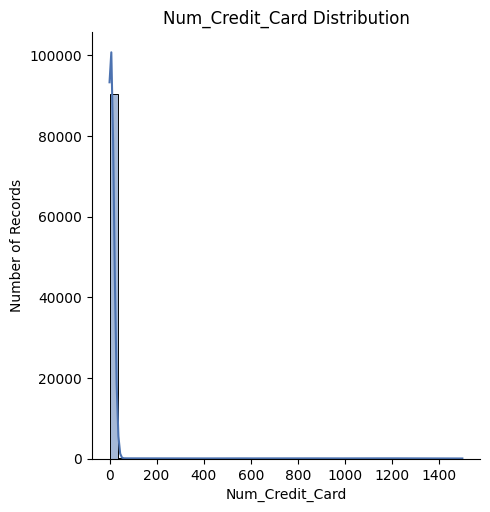

0        4
1        4
3        4
4        4
5        4
        ..
99995    6
99996    6
99997    6
99998    6
99999    6
Name: Num_Credit_Card, Length: 92566, dtype: int64
q25 4.0 q75 7.0
-0.5 11.5
5.0     17007
7.0     15450
6.0     15398
4.0     12924
3.0     12148
8.0      4699
10.0     4626
9.0      4407
NaN      2109
2.0      1901
1.0      1850
11.0       35
0.0        12
Name: Num_Credit_Card, dtype: int64
5.0     17007
7.0     15450
6.0     15398
4.0     12924
3.0     12148
8.0      4699
10.0     4626
9.0      4407
2.0      1901
1.0      1850
11.0       35
0.0        12
Name: Num_Credit_Card, dtype: int64

Num_Credit_Card Distribution


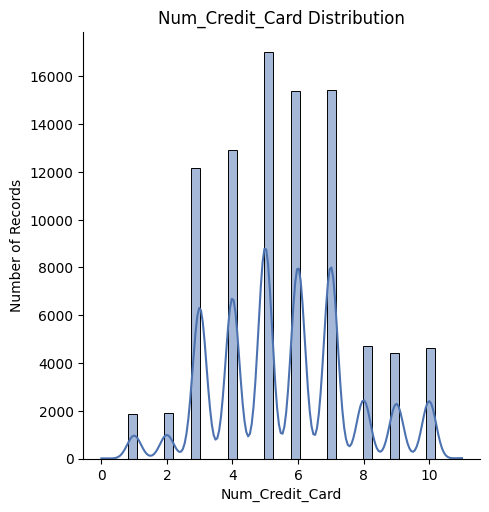

In [91]:
column_name = 'Num_Credit_Card'
group_by = 'Customer_ID'

# Get Details
get_column_details(df_clean,column_name)

# Cleaning
df_clean = clean_numerical_field(df_clean, column_name)

# Plot Graph
plot_displot(df_clean, column_name, bins=40)

# iqr
df_clean = outlier_iqr_drop(df_clean, group_by, column_name)

# Plot Graph
plot_displot(df_clean, column_name, bins=40)

In [92]:
df_clean.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,1,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,2,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
3,0x1605,CUS_0xd40,4,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,5,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
5,0x1607,CUS_0xd40,6,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,High_spent_Medium_value_payments,340.4792117872438,Good


In [93]:
df_clean.shape

(90457, 28)

### Interest Rate
#### 특이치 존재, 정리 후 금리 범위 1% ~ 34%

Details of Interest_Rate column

DataType:  int64

There are no null values

Number of Unique Values:  1627

Distribution of column:

8       4452
5       4439
6       4204
9       4030
12      4018
        ... 
4372       1
4905       1
1683       1
3660       1
5729       1
Name: Interest_Rate, Length: 1627, dtype: int64

Interest_Rate Distribution


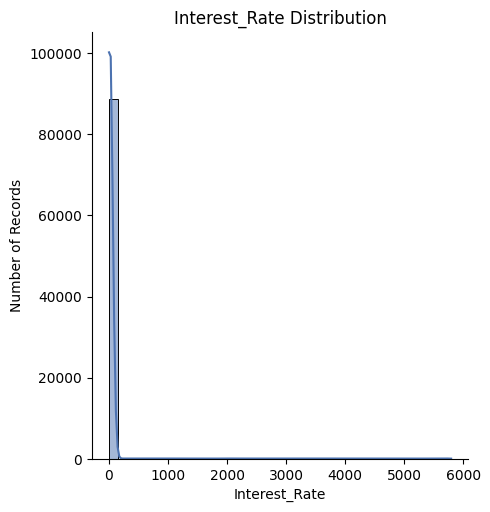

0        3
1        3
3        3
4        3
5        3
        ..
99995    7
99996    7
99997    7
99998    7
99999    7
Name: Interest_Rate, Length: 90457, dtype: int64
q25 8.0 q75 21.0
-11.5 40.5
8.0     4452
5.0     4439
6.0     4204
9.0     4030
12.0    4018
7.0     3990
10.0    3979
11.0    3864
18.0    3825
15.0    3697
20.0    3650
17.0    3515
16.0    3439
19.0    3380
3.0     2345
1.0     2299
4.0     2255
13.0    2215
2.0     2113
14.0    2050
NaN     1864
32.0    1610
22.0    1598
30.0    1573
24.0    1571
23.0    1548
29.0    1543
27.0    1502
28.0    1497
25.0    1462
21.0    1438
34.0    1401
26.0    1389
33.0    1352
31.0    1350
Name: Interest_Rate, dtype: int64
8.0     4452
5.0     4439
6.0     4204
9.0     4030
12.0    4018
7.0     3990
10.0    3979
11.0    3864
18.0    3825
15.0    3697
20.0    3650
17.0    3515
16.0    3439
19.0    3380
3.0     2345
1.0     2299
4.0     2255
13.0    2215
2.0     2113
14.0    2050
32.0    1610
22.0    1598
30.0    1573
24.0    1571
2

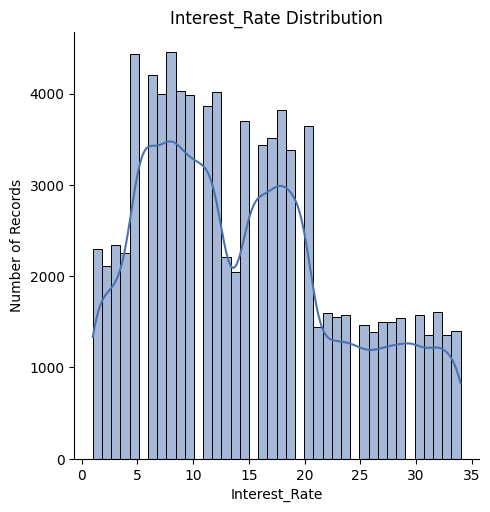

In [94]:
column_name = 'Interest_Rate'
group_by = 'Customer_ID'

# Get Details
get_column_details(df_clean,column_name)

# Cleaning
df_clean = clean_numerical_field(df_clean, column_name)

# Plot Graph
plot_displot(df_clean, column_name, bins=40)

# iqr
df_clean = outlier_iqr_drop(df_clean, group_by, column_name)

# Plot Graph
plot_displot(df_clean, column_name, bins=40)

In [95]:
df_clean.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,1,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,2,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
3,0x1605,CUS_0xd40,4,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,5,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
5,0x1607,CUS_0xd40,6,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,High_spent_Medium_value_payments,340.4792117872438,Good


In [96]:
df_clean.shape

(88593, 28)

### Delay from Due Date
#### 납기일로부터의 지연은 0일에서 30일 사이에 집중되어 있습니다.

Details of Delay_from_due_date column

DataType:  int64

There are no null values

Number of Unique Values:  73

Distribution of column:

 15    3150
 13    3013
 8     2894
 14    2879
 10    2847
       ... 
 65      52
-4       49
 66      30
-5       27
 67      17
Name: Delay_from_due_date, Length: 73, dtype: int64

Delay_from_due_date Distribution


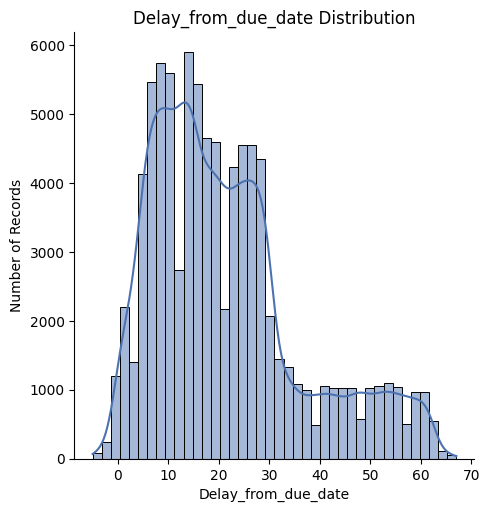

0         3
1         3
3         3
4         3
5         3
         ..
99994    23
99995    23
99996    23
99998    23
99999    23
Name: Delay_from_due_date, Length: 88593, dtype: int64
q25 10.0 q75 28.0
-17.0 55.0
 NaN     3642
 15.0    3150
 13.0    3013
 8.0     2894
 14.0    2879
         ... 
-1.0      177
-2.0      142
-3.0      101
-4.0       49
-5.0       27
Name: Delay_from_due_date, Length: 62, dtype: int64
 15.0    3150
 13.0    3013
 8.0     2894
 14.0    2879
 10.0    2847
         ... 
-1.0      177
-2.0      142
-3.0      101
-4.0       49
-5.0       27
Name: Delay_from_due_date, Length: 61, dtype: int64

Delay_from_due_date Distribution


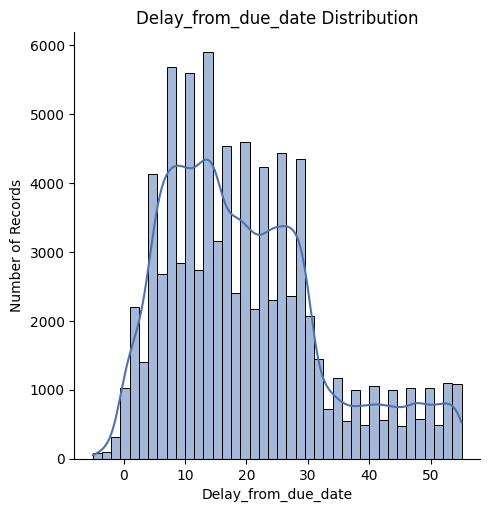

In [97]:
column_name = 'Delay_from_due_date'
group_by = 'Customer_ID'

# Get Details
get_column_details(df_clean,column_name)

# Cleaning
df_clean = clean_numerical_field(df_clean, column_name)

# Plot Graph
plot_displot(df_clean, column_name, bins=40)

# iqr
df_clean = outlier_iqr_drop(df_clean, group_by, column_name)

# Plot Graph
plot_displot(df_clean, column_name, bins=40)

In [98]:
df_clean.shape

(84951, 28)

### Number of Delayed Payment

Details of Num_of_Delayed_Payment column

DataType:  object

There are  5985  null values

Number of Unique Values:  642

Distribution of column:

10      4522
19      4509
17      4506
16      4372
15      4334
        ... 
3489       1
1869       1
1685       1
2243       1
2047       1
Name: Num_of_Delayed_Payment, Length: 642, dtype: int64

_ are removed

Datatype of Num_of_Delayed_Payment is changed to float

Num_of_Delayed_Payment Distribution


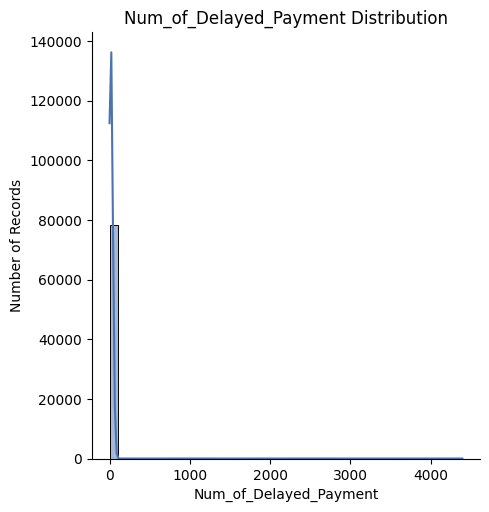

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local

0        4.0
1        4.0
3        4.0
4        4.0
5        4.0
        ... 
99994    6.0
99995    6.0
99996    6.0
99998    6.0
99999    6.0
Name: Num_of_Delayed_Payment, Length: 84951, dtype: float64
q25 nan q75 nan
nan nan
NaN       5985
10.0      4657
19.0      4639
17.0      4637
16.0      4487
          ... 
640.0        1
2573.0       1
3845.0       1
2697.0       1
2047.0       1
Name: Num_of_Delayed_Payment, Length: 606, dtype: int64
10.0      4657
19.0      4639
17.0      4637
16.0      4487
12.0      4467
          ... 
640.0        1
2573.0       1
3845.0       1
2697.0       1
2047.0       1
Name: Num_of_Delayed_Payment, Length: 605, dtype: int64

-----------------------------------------------------

There are  538  negative values(Before)

-----------------------------------------------------

There are  0  negative values(After)

Num_of_Delayed_Payment Distribution


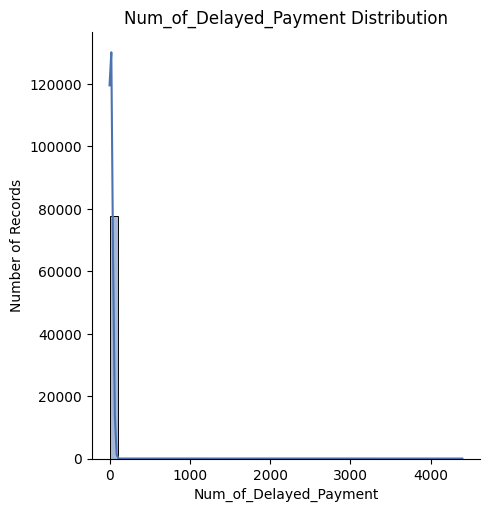

In [99]:
column_name = 'Num_of_Delayed_Payment'
group_by = 'Customer_ID'

# Get Details
get_column_details(df_clean,column_name)

# Cleaning
df_clean = clean_numerical_field(df_clean, column_name, strip='_', datatype='float')

# Plot Graph
plot_displot(df_clean, column_name, bins=40)

# maximum
# *** null값 처리***

# iqr
df_clean = outlier_iqr_drop(df_clean, group_by, column_name)

# remove
df_clean =remove_negatives(df_clean, column_name)

# Plot Graph
plot_displot(df_clean, column_name, bins=40)

In [100]:
df_clean.shape

(78428, 28)

### Changed Credit Limit

Details of Changed_Credit_Limit column

DataType:  object

There are no null values

Number of Unique Values:  4206

Distribution of column:

_                     1626
8.22                   111
11.32                  103
10.06                  103
11.5                    96
                      ... 
-1.22                    1
35.89                    1
4.619999999999999        1
31.04                    1
3.6199999999999988       1
Name: Changed_Credit_Limit, Length: 4206, dtype: int64

Garbage value _ is replaced with np.nan

_ are removed

Datatype of Changed_Credit_Limit is changed to float

Changed_Credit_Limit Distribution


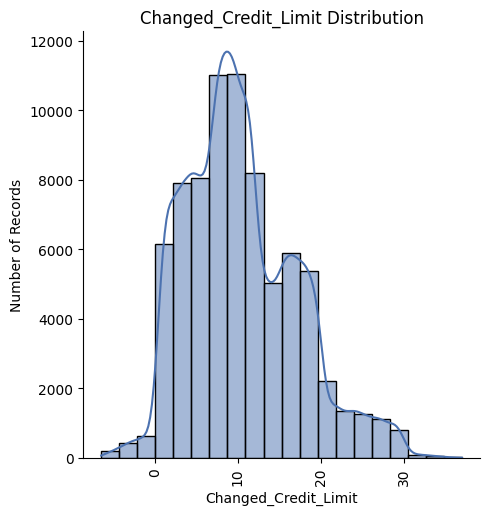

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


0        11.27
3        11.27
5        11.27
6        11.27
7        11.27
         ...  
99991    18.31
99994    11.50
99995    11.50
99996    11.50
99999    11.50
Name: Changed_Credit_Limit, Length: 78428, dtype: float64
q25 nan q75 nan
nan nan
 NaN      1626
 8.22      111
 11.32     103
 10.06     103
 11.50      96
          ... 
-1.22        1
 35.89       1
 4.62        1
 31.04       1
 3.62        1
Name: Changed_Credit_Limit, Length: 4206, dtype: int64
 8.22     111
 11.32    103
 10.06    103
 11.50     96
 9.25      94
         ... 
-1.22       1
 35.89      1
 4.62       1
 31.04      1
 3.62       1
Name: Changed_Credit_Limit, Length: 4205, dtype: int64

Changed_Credit_Limit Distribution


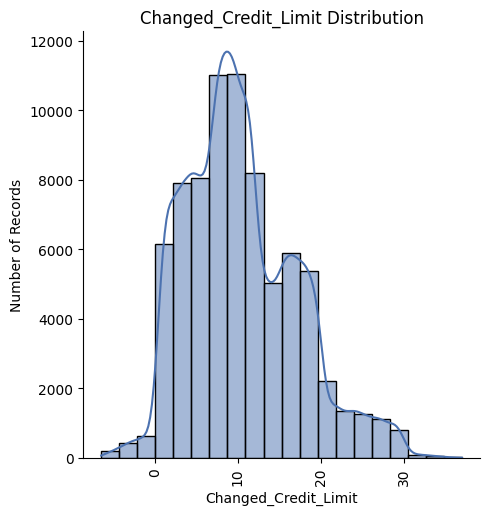

In [101]:
column_name = 'Changed_Credit_Limit'
group_by = 'Customer_ID'

#Get Details
get_column_details(df_clean,column_name)

# 마이너스 냅두기

#Cleaning
df_clean = clean_numerical_field(df_clean, column_name, strip='_', datatype='float', replace_value='_')

plot_displot(df_clean, column_name,rotation=90)

# iqr
df_clean = outlier_iqr_drop(df_clean, group_by, column_name)

#Plot Graph
plot_displot(df_clean, column_name,rotation=90)

### Number of Credit Inquiries

Details of Num_Credit_Inquiries column

DataType:  float64

There are  1495  null values

Number of Unique Values:  1028

Distribution of column:

4.0       8870
3.0       6855
2.0       6277
7.0       6274
6.0       6262
          ... 
530.0        1
1951.0       1
1721.0       1
2397.0       1
74.0         1
Name: Num_Credit_Inquiries, Length: 1028, dtype: int64

Num_Credit_Inquiries Distribution


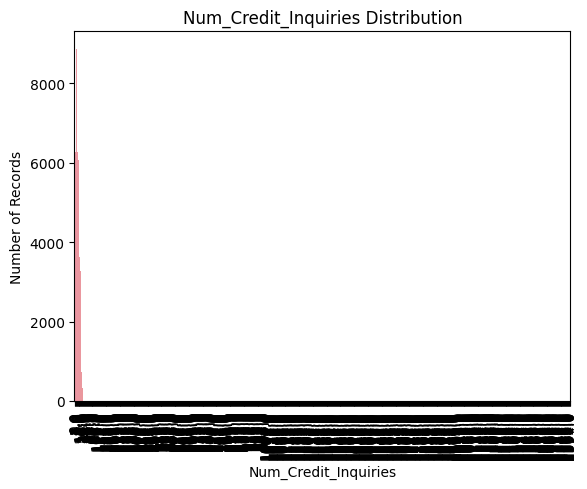


No. of missing values before filling with group median: 1495


/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)



No. of missing values after filling with group median: 1


/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


0        4.0
3        4.0
5        4.0
6        4.0
7        4.0
        ... 
99991    9.0
99994    3.0
99995    3.0
99996    3.0
99999    3.0
Name: Num_Credit_Inquiries, Length: 76802, dtype: float64
q25 nan q75 nan
nan nan
4.0       9064
3.0       6998
2.0       6430
7.0       6388
6.0       6372
          ... 
530.0        1
1951.0       1
1721.0       1
2397.0       1
74.0         1
Name: Num_Credit_Inquiries, Length: 1043, dtype: int64
4.0       9064
3.0       6998
2.0       6430
7.0       6388
6.0       6372
          ... 
1951.0       1
1721.0       1
2397.0       1
621.0        1
74.0         1
Name: Num_Credit_Inquiries, Length: 1042, dtype: int64

Num_Credit_Inquiries Distribution


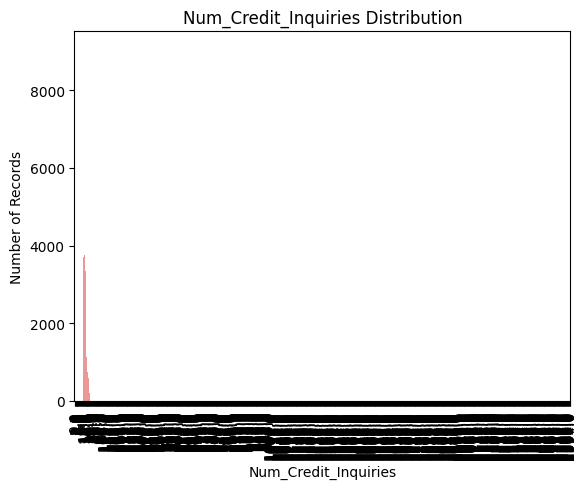

In [102]:
column_name = 'Num_Credit_Inquiries'
group_by = 'Customer_ID'

#Get Details
get_column_details(df_clean,column_name)

#Cleaning
df_clean = clean_numerical_field(df_clean, column_name)

#Plot Graph
plot_countplot(df_clean,column_name,rotation=90)

# median
df_clean = fill_missing_with_group_median(df_clean, group_by, column_name)

# iqr
df_clean = outlier_iqr_drop(df_clean, group_by, column_name)

#Plot Graph
plot_countplot(df_clean,column_name,rotation=90)

### Outstanding Debt

Details of Outstanding_Debt column

DataType:  object

There are no null values

Number of Unique Values:  12315

Distribution of column:

460.46      18
1151.7      17
953.75      16
407.8       16
1455.64     16
            ..
493.42_      1
3988.4_      1
1096.02_     1
153.48_      1
3025.44_     1
Name: Outstanding_Debt, Length: 12315, dtype: int64

_ are removed

Datatype of Outstanding_Debt is changed to <class 'float'>

Outstanding_Debt Distribution


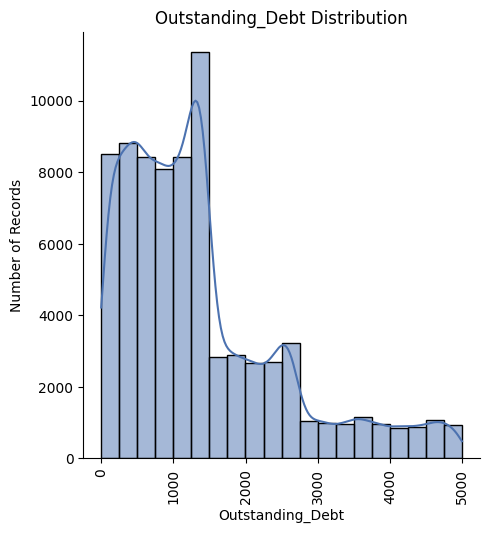

0         809.98
3         809.98
5         809.98
6         809.98
7         809.98
          ...   
99991    3571.70
99994     502.38
99995     502.38
99996     502.38
99999     502.38
Name: Outstanding_Debt, Length: 76801, dtype: float64
q25 554.69 q75 1846.37
-1382.8299999999997 3783.8899999999994
NaN        4588
460.46       19
1151.70      17
407.80       16
1408.66      16
           ... 
1916.20       1
2588.85       1
3773.56       1
1558.88       1
2681.54       1
Name: Outstanding_Debt, Length: 10837, dtype: int64
460.46     19
1151.70    17
604.77     16
1426.06    16
407.80     16
           ..
1916.20     1
2588.85     1
3773.56     1
1558.88     1
2681.54     1
Name: Outstanding_Debt, Length: 10836, dtype: int64

Outstanding_Debt Distribution


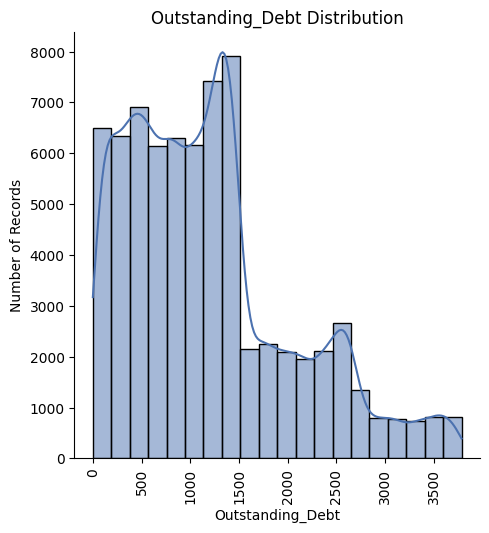

In [103]:
column_name = 'Outstanding_Debt'
group_by = 'Customer_ID'

#Get Details
get_column_details(df_clean,column_name)

#Cleaning
df_clean = clean_numerical_field(df_clean,column_name,strip='_',datatype=float)

plot_displot(df_clean,column_name,rotation=90)

# iqr
df_clean = outlier_iqr_drop(df_clean, group_by, column_name)

#Plot Graph
plot_displot(df_clean,column_name,rotation=90)

### Credit Utilization Ratio
#### No cleaning is required

Details of Credit_Utilization_Ratio column

DataType:  float64

There are no null values

Number of Unique Values:  100000

Distribution of column:

26.822620    1
28.327949    1
30.016576    1
25.478841    1
33.933755    1
            ..
30.687138    1
38.730069    1
30.017515    1
27.279794    1
34.192463    1
Name: Credit_Utilization_Ratio, Length: 100000, dtype: int64

Credit_Utilization_Ratio Distribution


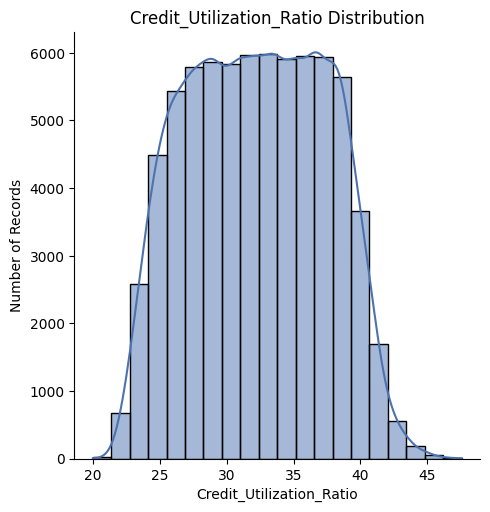

0        22.537593
3        22.537593
5        22.537593
6        22.537593
7        22.537593
           ...    
99991    22.895966
99994    34.192463
99995    34.192463
99996    34.192463
99999    34.192463
Name: Credit_Utilization_Ratio, Length: 72213, dtype: float64
q25 28.0565157417325 q75 36.46928010389053
15.437369198495452 49.088426647127584
26.822620    1
31.754987    1
27.371427    1
28.178892    1
26.128684    1
            ..
34.713192    1
35.827305    1
38.440342    1
30.974444    1
34.192463    1
Name: Credit_Utilization_Ratio, Length: 72213, dtype: int64
26.822620    1
31.754987    1
27.371427    1
28.178892    1
26.128684    1
            ..
34.713192    1
35.827305    1
38.440342    1
30.974444    1
34.192463    1
Name: Credit_Utilization_Ratio, Length: 72213, dtype: int64

Credit_Utilization_Ratio Distribution


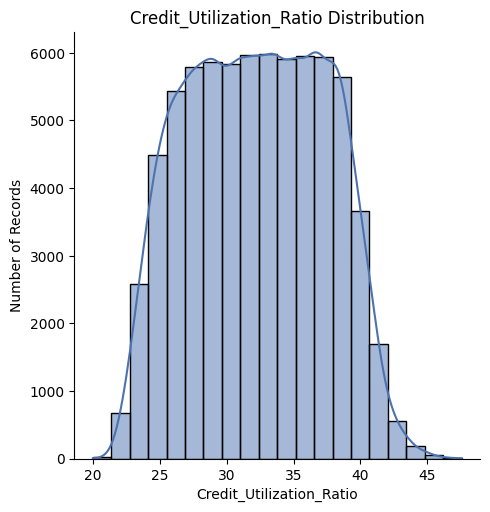

In [104]:
column_name = 'Credit_Utilization_Ratio'
group_by = 'Customer_ID'

#Get Details
get_column_details(df_train,column_name)

plot_displot(df_clean,column_name)

# iqr
df_clean = outlier_iqr_drop(df_clean, group_by, column_name)

#Plot Graph
plot_displot(df_clean,column_name)

### Credit History Age

Details of Credit_History_Age column

DataType:  object

There are  6601  null values

Number of Unique Values:  404

Distribution of column:

15 Years and 9 Months     353
17 Years and 11 Months    353
19 Years and 5 Months     353
17 Years and 10 Months    349
15 Years and 11 Months    345
                         ... 
0 Years and 5 Months       12
0 Years and 3 Months       10
33 Years and 8 Months      10
0 Years and 2 Months        6
0 Years and 1 Months        1
Name: Credit_History_Age, Length: 404, dtype: int64

Datatype of Credit_History_Age is changed to <class 'float'>

No. of missing values before filling with group median: 6601


/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)



No. of missing values after filling with group median: 5


/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


0        265.0
3        265.0
5        265.0
6        265.0
7        265.0
         ...  
99991     71.0
99994    377.0
99995    377.0
99996    377.0
99999    377.0
Name: Credit_History_Age, Length: 72213, dtype: float64
q25 nan q75 nan
nan nan
215.0    376
233.0    373
189.0    371
191.0    367
214.0    366
        ... 
17.5       1
141.5      1
19.5       1
4.5        1
66.5       1
Name: Credit_History_Age, Length: 767, dtype: int64
215.0    376
233.0    373
189.0    371
191.0    367
214.0    366
        ... 
17.5       1
141.5      1
19.5       1
4.5        1
66.5       1
Name: Credit_History_Age, Length: 766, dtype: int64

Credit_History_Age Distribution


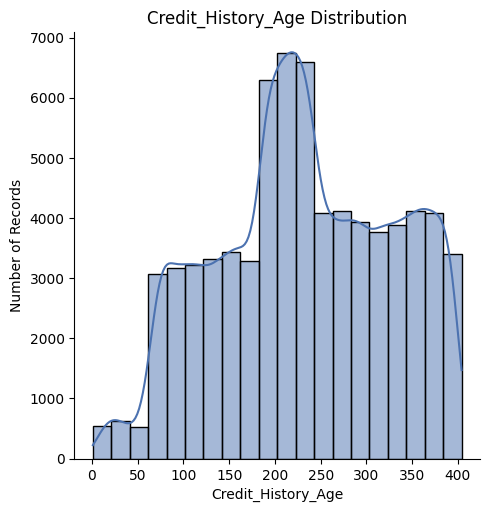

In [105]:
column_name = 'Credit_History_Age' # nan nan : lower, upper
group_by = 'Customer_ID'

#Get Details
get_column_details(df_clean,column_name)

df_clean = Month_Converter(df_clean, column_name)

#Cleaning
df_clean = clean_numerical_field(df_clean,column_name,datatype=float)

# median
df_clean = fill_missing_with_group_median(df_clean, group_by, column_name)

# iqr
df_clean = outlier_iqr_drop(df_clean, group_by, column_name)

#Plot Graph
plot_displot(df_clean,column_name)


### Total EMI per month

Details of Total_EMI_per_month column

DataType:  float64

There are no null values

Number of Unique Values:  12656

Distribution of column:

0.000000        8246
162.488448         8
379.603790         8
85.029359          8
181.034099         8
                ... 
53018.000000       1
137.451564         1
12839.000000       1
60013.000000       1
55164.000000       1
Name: Total_EMI_per_month, Length: 12656, dtype: int64

Total_EMI_per_month Distribution


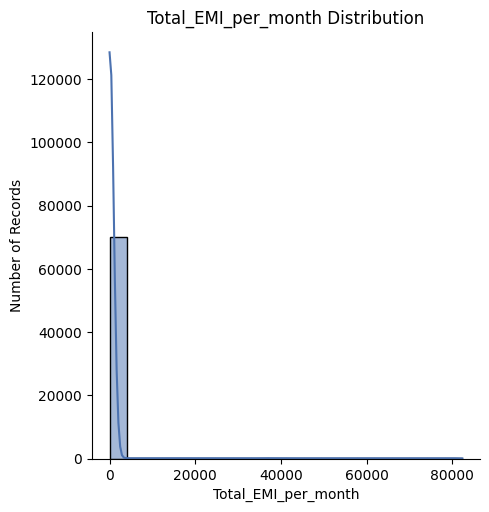

0        49.574949
3        49.574949
5        49.574949
6        49.574949
7        49.574949
           ...    
99991    60.964772
99994    35.104023
99995    35.104023
99996    35.104023
99999    35.104023
Name: Total_EMI_per_month, Length: 72208, dtype: float64
q25 27.842162319324608 q75 148.63879469636794
-153.35278624624036 329.8337432619329
0.000000      8246
NaN           5055
145.552422       8
88.455404        8
95.967688        8
              ... 
16.123606        1
13.218559        1
54.263164        1
226.324824       1
26.688750        1
Name: Total_EMI_per_month, Length: 9786, dtype: int64
0.000000      8246
145.552422       8
88.455404        8
95.967688        8
78.302391        8
              ... 
16.123606        1
13.218559        1
54.263164        1
226.324824       1
26.688750        1
Name: Total_EMI_per_month, Length: 9785, dtype: int64

Total_EMI_per_month Distribution


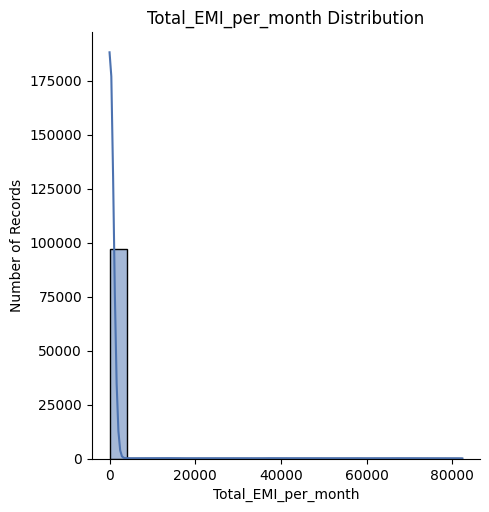

In [106]:
column_name = 'Total_EMI_per_month'
group_by = 'Customer_ID'

#Get Details
get_column_details(df_clean,column_name)

#Cleaning
df_clean = clean_numerical_field(df_clean, column_name)

#Plot Graph
plot_displot(df_clean, column_name)

# iqr
df_clean = outlier_iqr_drop(df_clean, group_by, column_name)

plot_displot(df_train, column_name)

### Amount Invested Monthly

Details of Amount_invested_monthly column

DataType:  object

There are  2994  null values

Number of Unique Values:  61202

Distribution of column:

__10000__             2861
0.0                     98
80.41529543900253        1
33.328452256202844       1
96.24763280890413        1
                      ... 
233.18762854438597       1
320.4163495079863        1
150.496159444129         1
318.89584090985517       1
167.1638651610451        1
Name: Amount_invested_monthly, Length: 61202, dtype: int64

_ are removed

Datatype of Amount_invested_monthly is changed to <class 'float'>

Amount_invested_monthly Distribution


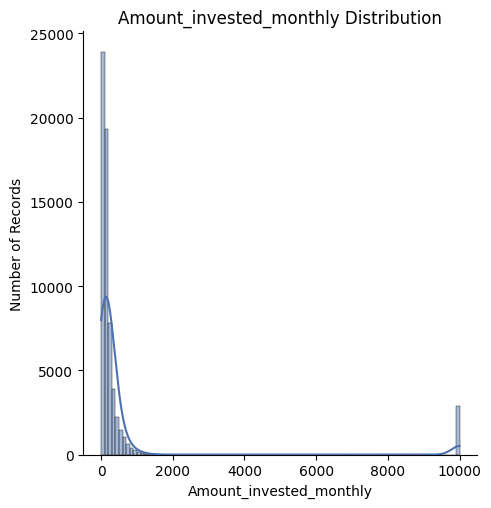


No. of missing values before filling with group median: 2994


/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)



No. of missing values after filling with group median: 7


/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


0        24.785217
3        24.785217
5        24.785217
6        24.785217
7        24.785217
           ...    
99991    34.662906
99994    54.185950
99995    54.185950
99996    54.185950
99999    54.185950
Name: Amount_invested_monthly, Length: 67153, dtype: float64
q25 nan q75 nan
nan nan
10000.000000    2864
0.000000          98
NaN                7
123.971219         6
482.708387         4
                ... 
136.829006         1
367.085161         1
279.126697         1
350.180574         1
167.163865         1
Name: Amount_invested_monthly, Length: 62470, dtype: int64
10000.000000    2864
0.000000          98
123.971219         6
108.024604         4
501.979592         4
                ... 
136.829006         1
367.085161         1
279.126697         1
350.180574         1
167.163865         1
Name: Amount_invested_monthly, Length: 62469, dtype: int64

Amount_invested_monthly Distribution


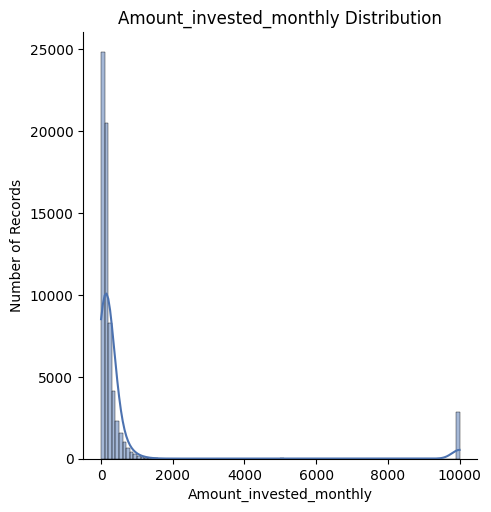

In [107]:
column_name = 'Amount_invested_monthly'
group_by = 'Customer_ID'

#Get Details
get_column_details(df_clean,column_name)

#Cleaning
df_clean = clean_numerical_field(df_clean,column_name,strip='_',datatype=float)

#Plot Graph
plot_displot(df_clean, column_name, bins= 100)

# median
df_clean = fill_missing_with_group_median(df_clean, group_by, column_name)

# iqr
df_clean = outlier_iqr_drop(df_clean, group_by, column_name)

plot_displot(df_clean, column_name,bins=100)

### Monthly Balance

Details of Monthly_Balance column

DataType:  object

There are  510  null values

Number of Unique Values:  66630

Distribution of column:

__-333333333333333333333333333__    7
312.49408867943663                  1
343.75989051862325                  1
397.98190588571214                  1
413.391738716909                    1
                                   ..
313.58365552224006                  1
217.75621211839626                  1
338.5603405948357                   1
311.1523929241697                   1
393.6736955618808                   1
Name: Monthly_Balance, Length: 66630, dtype: int64

Garbage value __-333333333333333333333333333__ is replaced with np.nan

Datatype of Monthly_Balance is changed to <class 'float'>

Monthly_Balance Distribution


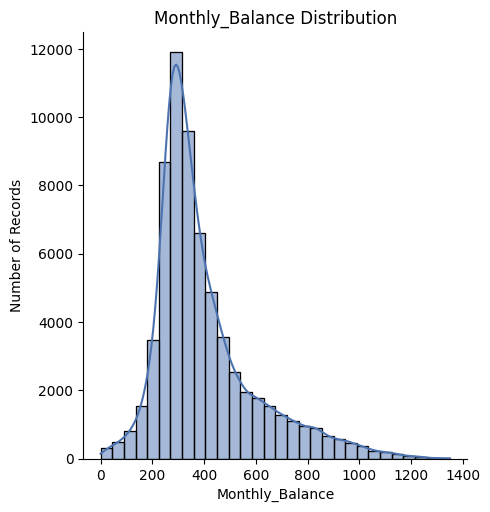


No. of missing values before filling with group median: 517


/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)



No. of missing values after filling with group median: 1


/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


0        223.451310
3        223.451310
5        223.451310
6        223.451310
7        223.451310
            ...    
99991    208.047884
99994    393.673696
99995    393.673696
99996    393.673696
99999    393.673696
Name: Monthly_Balance, Length: 67146, dtype: float64
q25 nan q75 nan
nan nan
285.844993    4
309.593379    4
342.020549    4
638.726312    3
298.870372    3
             ..
433.260668    1
756.462543    1
768.808927    1
336.059961    1
393.673696    1
Name: Monthly_Balance, Length: 66854, dtype: int64
342.020549    4
285.844993    4
309.593379    4
298.870372    3
583.734527    3
             ..
756.462543    1
768.808927    1
336.059961    1
714.189397    1
393.673696    1
Name: Monthly_Balance, Length: 66853, dtype: int64

Monthly_Balance Distribution


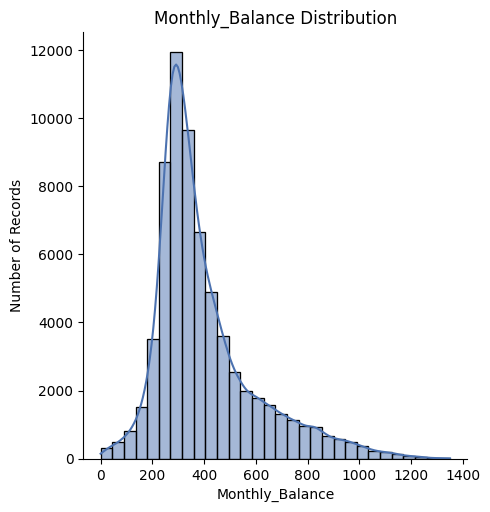

In [108]:
column_name = 'Monthly_Balance'
group_by = 'Customer_ID'

#Get Details
get_column_details(df_clean, column_name)

#Cleaning
df_clean[column_name] = df_clean[column_name].replace('',np.nan)
df_clean = clean_numerical_field(df_clean, column_name, datatype=float, replace_value = '__-333333333333333333333333333__')

#Plot Graph
plot_displot(df_clean,column_name, bins=30)

# median
df_clean = fill_missing_with_group_median(df_clean, group_by, column_name)

# iqr
df_clean = outlier_iqr_drop(df_clean, group_by, column_name)

plot_displot(df_clean, column_name,bins=30)


### Number of Loan

Details of Num_of_Loan column

DataType:  object

There are no null values

Number of Unique Values:  309

Distribution of column:

3       10734
2       10601
4       10037
0        7622
1        7370
        ...  
1257        1
164         1
1088        1
1236        1
966         1
Name: Num_of_Loan, Length: 309, dtype: int64

_ are removed

Datatype of Num_of_Loan is changed to <class 'float'>

Num_of_Loan Distribution


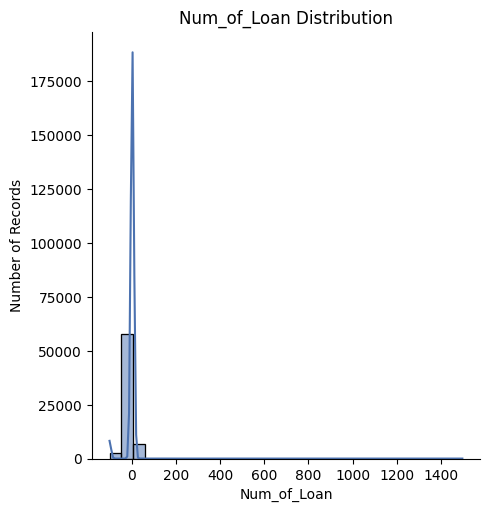

0        4.0
3        4.0
5        4.0
6        4.0
7        4.0
        ... 
99991    5.0
99994    2.0
99995    2.0
99996    2.0
99999    2.0
Name: Num_of_Loan, Length: 67145, dtype: float64
q25 1.0 q75 4.0
-3.5 8.5
3.0    11261
2.0    11179
4.0    10554
0.0     8030
1.0     7763
6.0     4497
5.0     4312
NaN     4292
7.0     4053
8.0     1204
Name: Num_of_Loan, dtype: int64
3.0    11261
2.0    11179
4.0    10554
0.0     8030
1.0     7763
6.0     4497
5.0     4312
7.0     4053
8.0     1204
Name: Num_of_Loan, dtype: int64

-----------------------------------------------------

There are  0  negative values(Before)

-----------------------------------------------------

There are  0  negative values(After)

Num_of_Loan Distribution


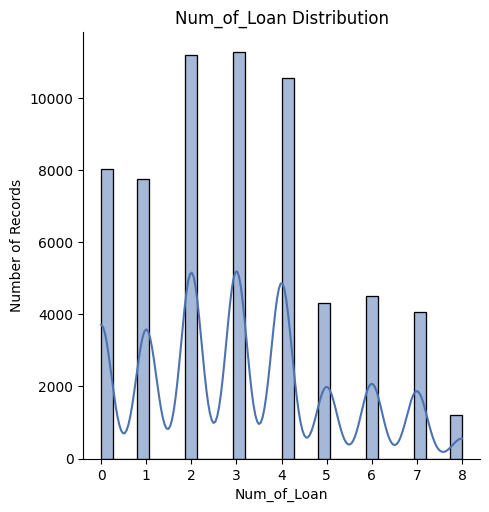

In [109]:
column_name = 'Num_of_Loan'
group_by = 'Customer_ID'

#Get Details
get_column_details(df_clean, column_name)

# clean
df_clean = clean_numerical_field(df_clean,column_name,strip='_',datatype=float)

# plot
plot_displot(df_clean,column_name,bins=30)

# iqr
df_clean = outlier_iqr_drop(df_clean, group_by, column_name)
#outlier_iqr_fill(df_clean, group_by, column_name)

# remove
df_clean = remove_negatives(df_clean, column_name)

# plot
plot_displot(df_clean,column_name,bins=30)

## 데이터 전처리 후 null 값 확인

In [110]:
# Check if null values are present
df_clean.isnull().sum()

ID                             0
Customer_ID                    0
Month                          0
Name                        6263
Age                            0
SSN                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary          0
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                8030
Delay_from_due_date            0
Num_of_Delayed_Payment         0
Changed_Credit_Limit           0
Num_Credit_Inquiries           0
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age             0
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly        0
Payment_Behaviour              0
Monthly_Balance                0
Credit_Score                   0
dtype: int64

## Data Transformation
### 'ID','Customer_ID','Name','SSN' 제외

In [111]:
# Drop columns
print("Size of Dataset before dropping columns : ",df_clean.shape)
drop_columns = ['ID','Customer_ID','Name','SSN', 'Type_of_Loan']
df_clean.drop(drop_columns,axis=1,inplace=True)
print("Size of Dataset after dropping columns : ",df_clean.shape)

Size of Dataset before dropping columns :  (62853, 28)
Size of Dataset after dropping columns :  (62853, 23)


### Label Encoding
#### Occupation','Type_of_Loan','Credit_Mix','Payment_of_Min_Amount','Payment_Behaviour','Credit_Score'

In [112]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['Occupation','Credit_Mix','Payment_of_Min_Amount','Payment_Behaviour','Credit_Score']
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Loop through each column and apply label encoding
for column in categorical_columns:
    df_clean[column] = label_encoder.fit_transform(df_clean[column])

In [113]:
df_clean.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,1,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,...,3,809.98,26.822620,265.0,0,49.574949,80.415295,2,312.494089,0
3,4,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,5.0,...,1,809.98,31.377862,268.0,0,49.574949,199.458074,5,223.451310,0
5,6,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,8.0,...,1,809.98,27.262259,270.0,0,49.574949,62.430172,1,340.479212,0
6,7,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,...,1,809.98,22.537593,271.0,0,49.574949,178.344067,5,244.565317,0
7,8,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,...,1,809.98,23.933795,269.0,0,49.574949,24.785217,1,358.124168,2


## 데이터 분할

In [114]:
#Spli Input & Output Data
X = df_clean.drop('Credit_Score',axis=1)
y = df_clean['Credit_Score']
print(X.shape)
print(y.shape)

(62853, 22)
(62853,)


In [115]:
# 데이터 정규화
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)


#standard = StandardScaler()
#standard.fit(train_X)
#train_X_scale = standard.transform(train_X)

# model building

In [116]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score,classification_report,confusion_matrix

## 1

In [117]:
# Split Data 8:2
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17,stratify=y)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(50282, 22)
(12571, 22)
(50282,)
(12571,)


### Pycaret

In [118]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.4/484.4 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 15.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 47.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 53.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 52.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 52.3 MB/s eta 0:0

In [119]:
from pycaret.classification import *

In [120]:
#Spli Input & Output Data
X = df_clean.drop('Credit_Score',axis=1)
y = df_clean['Credit_Score']
print(X.shape)
print(y.shape)

(62853, 22)
(62853,)


In [121]:
X

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,1,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,...,4.0,3,809.98,26.822620,265.0,0,49.574949,80.415295,2,312.494089
3,4,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,5.0,...,4.0,1,809.98,31.377862,268.0,0,49.574949,199.458074,5,223.451310
5,6,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,8.0,...,4.0,1,809.98,27.262259,270.0,0,49.574949,62.430172,1,340.479212
6,7,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,...,4.0,1,809.98,22.537593,271.0,0,49.574949,178.344067,5,244.565317
7,8,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,...,4.0,1,809.98,23.933795,269.0,0,49.574949,24.785217,1,358.124168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99991,8,29.0,1,20002.88,1929.906667,10.0,8.0,29.0,5.0,33.0,...,9.0,0,3571.70,37.140784,75.0,1,60.964772,34.662906,0,337.362988
99994,3,25.0,9,39628.99,3359.415833,4.0,6.0,7.0,2.0,20.0,...,3.0,3,502.38,39.323569,377.0,0,35.104023,140.581403,1,410.256158
99995,4,25.0,9,39628.99,3359.415833,4.0,6.0,7.0,2.0,23.0,...,3.0,3,502.38,34.663572,378.0,0,35.104023,60.971333,0,479.866228
99996,5,25.0,9,39628.99,3359.415833,4.0,6.0,7.0,2.0,18.0,...,3.0,3,502.38,40.565631,379.0,0,35.104023,54.185950,1,496.651610


In [122]:
# 모델 생성
model = setup(df_clean, target = 'Credit_Score', session_id = 123)

,Description,Value
0,Session id,123
1,Target,Credit_Score
2,Target type,Multiclass
3,Original data shape,"(62853, 23)"
4,Transformed data shape,"(62853, 23)"
5,Transformed train set shape,"(43997, 23)"
6,Transformed test set shape,"(18856, 23)"
7,Numeric features,22
8,Preprocess,True
9,Imputation type,simple


In [123]:
best_model = compare_models(round = 4, sort = 'Accuracy', n_select = 1, verbose = True)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8009,0.9052,0.8009,0.8003,0.8004,0.6596,0.6599,8.8380
rf,Random Forest Classifier,0.7927,0.9034,0.7927,0.7924,0.7925,0.6475,0.6476,15.4030
xgboost,Extreme Gradient Boosting,0.7657,0.8869,0.7657,0.7656,0.7654,0.6009,0.6011,30.2590
lightgbm,Light Gradient Boosting Machine,0.7513,0.8780,0.7513,0.7529,0.7516,0.5780,0.5784,2.6090
gbc,Gradient Boosting Classifier,0.7219,0.8526,0.7219,0.7230,0.7217,0.5252,0.5258,52.0010
dt,Decision Tree Classifier,0.6950,0.7359,0.6950,0.6949,0.6948,0.4829,0.4830,0.9170
knn,K Neighbors Classifier,0.6797,0.8061,0.6797,0.6782,0.6788,0.4552,0.4553,2.4370
ada,Ada Boost Classifier,0.6708,0.7289,0.6708,0.6695,0.6661,0.4222,0.4256,3.7330
lda,Linear Discriminant Analysis,0.6623,0.7807,0.6623,0.6582,0.6550,0.3998,0.4047,0.3140
qda,Quadratic Discriminant Analysis,0.6547,0.7873,0.6547,0.6881,0.6614,0.4487,0.4573,0.1510


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [124]:
best_model

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)

## 2 - pycaret 돌려보고 베스트 모델

### 불균형 데이터 처리

In [125]:
# Handle Imbalance Data
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

0    34831
2    34831
1    34831
Name: Credit_Score, dtype: int64

In [126]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(83594, 22)
(20899, 22)
(83594,)
(20899,)


In [127]:
from sklearn.ensemble import ExtraTreesClassifier
extra_trees_model = ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)
# Train the classifier
extra_trees_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = extra_trees_model.predict(X_test)

# Accuaracy
print(np.mean(y_test == y_pred))

0.8790851236901287


In [128]:
# Training the classifier
best_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluating the model
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

### 베스트 모델 변수중요도 확인

Text(0.5, 1.0, 'Top feature importance')

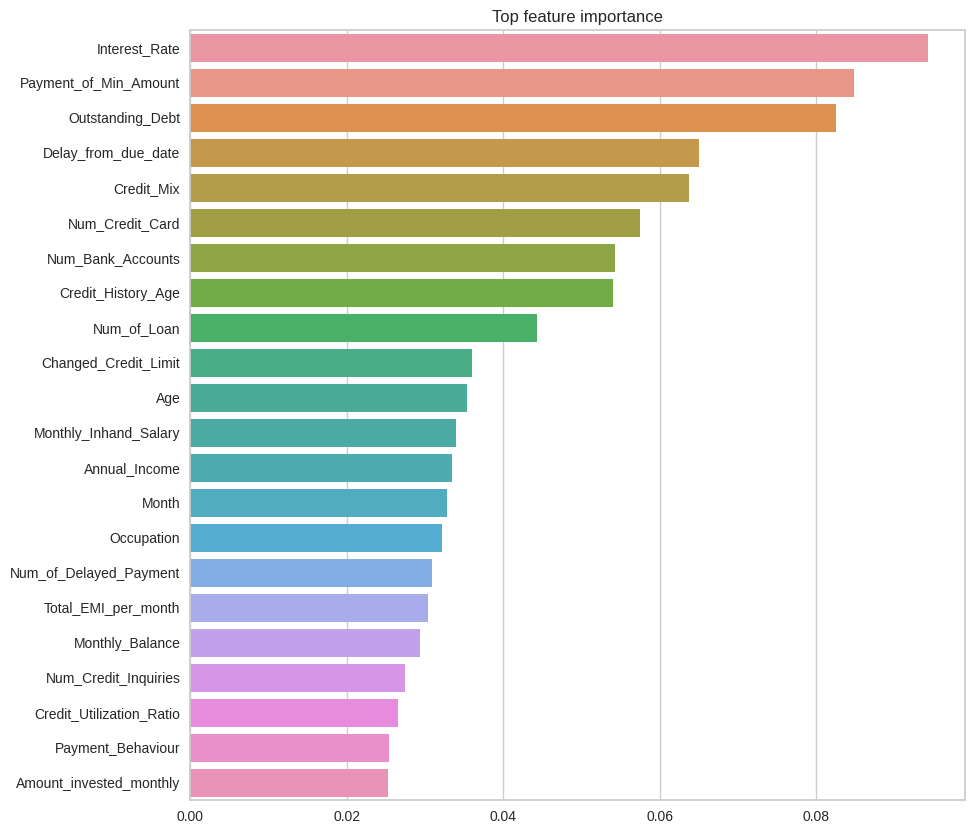

In [129]:
# 변수 중요도
f_imp_v = best_model.feature_importances_
f_imp_v = pd.Series(f_imp_v, index = X.columns)
f_imp_v.sort_values(ascending=False)

# 시각화
f_top = f_imp_v.sort_values(ascending=False)
plt.figure(figsize = (10, 10))
sns.barplot(x = f_top, y = f_top.index)
plt.title('Top feature importance')